In [2]:
import pandas as pd

In [3]:
# load dataset
file_path = r'C:\Users\USER\OneDrive\Desktop\project\nga-rainfall-adm2-5ytd.csv'
data = pd.read_csv(file_path)

C:\Users\USER\AppData\Local\Temp\ipykernel_9044\2796332614.py:3: DtypeWarning: Columns (1,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [4]:
# display the first 5 rows
print(data.head(5))
print(data.info())

         date   adm2_id  ADM2_PCODE                 n_pixels  \
0       #date  #adm2+id  #adm2+code  #indicator+n_pixels+num   
1  2020-01-01     22980    NG029014                     28.0   
2  2020-01-11     22980    NG029014                     28.0   
3  2020-01-21     22980    NG029014                     28.0   
4  2020-02-01     22980    NG029014                     28.0   

                  rfh                 rfh_avg                 r1h  \
0  #indicator+rfh+num  #indicator+rfh_avg+num  #indicator+r1h+num   
1                 1.0                  3.2274             15.3214   
2                 1.0                  3.7071                 6.0   
3                 1.0                  6.0607                 3.0   
4                 1.0                  9.3012                 3.0   

                  r1h_avg                 r3h                 r3h_avg  \
0  #indicator+r1h_avg+num  #indicator+r3h+num  #indicator+r3h_avg+num   
1                  9.9821            330.8214         

In [5]:
# Check for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

# Convert relevant columns to numeric
columns_to_numeric = ['rfq', 'r1h', 'r3h', 'rfh', 'r1h_avg', 'r3h_avg', 'r1q', 'r3q']
data[columns_to_numeric] = data[columns_to_numeric].apply(pd.to_numeric, errors='coerce')

# Recheck missing values after conversion
missing_values_after_conversion = data.isnull().sum()

missing_values, data_types, missing_values_after_conversion


(date          0
 adm2_id       0
 ADM2_PCODE    0
 n_pixels      0
 rfh           0
 rfh_avg       0
 r1h           0
 r1h_avg       0
 r3h           0
 r3h_avg       0
 rfq           0
 r1q           0
 r3q           0
 version       0
 dtype: int64,
 date          object
 adm2_id       object
 ADM2_PCODE    object
 n_pixels      object
 rfh           object
 rfh_avg       object
 r1h           object
 r1h_avg       object
 r3h           object
 r3h_avg       object
 rfq           object
 r1q           object
 r3q           object
 version       object
 dtype: object,
 date          0
 adm2_id       0
 ADM2_PCODE    0
 n_pixels      0
 rfh           1
 rfh_avg       0
 r1h           1
 r1h_avg       1
 r3h           1
 r3h_avg       1
 rfq           1
 r1q           1
 r3q           1
 version       0
 dtype: int64)

In [7]:
# Fill missing values with the column mean
data_cleaned = data.fillna(data.mean())

# Checking for correlation between the features
correlation_matrix = data_cleaned[['rfq', 'r1h', 'r3h', 'rfh', 'r1h_avg', 'r3h_avg', 'r1q', 'r3q']].corr()

# Display the correlation matrix
correlation_matrix


C:\Users\USER\AppData\Local\Temp\ipykernel_9044\2899464838.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_cleaned = data.fillna(data.mean())


,rfq,r1h,r3h,rfh,r1h_avg,r3h_avg,r1q,r3q
rfq,1.000000,0.188839,0.099583,0.397611,-0.018138,0.002875,0.644098,0.346230
r1h,0.188839,1.000000,0.820736,0.883115,0.925881,0.810521,0.248577,-0.058395
r3h,0.099583,0.820736,1.000000,0.659083,0.815548,0.964812,0.146325,0.044593
rfh,0.397611,0.883115,0.659083,1.000000,0.825123,0.662944,0.191964,-0.075677
r1h_avg,-0.018138,0.925881,0.815548,0.825123,1.000000,0.874239,-0.048825,-0.218779
r3h_avg,0.002875,0.810521,0.964812,0.662944,0.874239,1.000000,0.001296,-0.133181
r1q,0.644098,0.248577,0.146325,0.191964,-0.048825,0.001296,1.000000,0.517383
r3q,0.346230,-0.058395,0.044593,-0.075677,-0.218779,-0.133181,0.517383,1.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Define the features and targets for 1-month and 3-month
features = ['rfh', 'r1h_avg', 'r3h_avg', 'r1q', 'r3q']
target_1h = 'r1h'
target_3h = 'r3h'

# Split the data for 1-month 
X_1h = data_cleaned[features]
y_1h = data_cleaned[target_1h]

X_train_1h, X_test_1h, y_train_1h, y_test_1h = train_test_split(X_1h, y_1h, test_size=0.2, random_state=42)

# Build and train the model for 1-month
model_1h = LinearRegression()
model_1h.fit(X_train_1h, y_train_1h)

# Make predictions for the test set
y_pred_1h = model_1h.predict(X_test_1h)

# Evaluate the 1-month rainfall model
mae_1h = mean_absolute_error(y_test_1h, y_pred_1h)
r2_1h = r2_score(y_test_1h, y_pred_1h)

# 3-month model
X_3h = data_cleaned[features]
y_3h = data_cleaned[target_3h]

X_train_3h, X_test_3h, y_train_3h, y_test_3h = train_test_split(X_3h, y_3h, test_size=0.2, random_state=42)

# Build and train the model for 3-hour 
model_3h = LinearRegression()
model_3h.fit(X_train_3h, y_train_3h)

# Make predictions for the test set
y_pred_3h = model_3h.predict(X_test_3h)

# Evaluate the 3-month rainfall model
mae_3h = mean_absolute_error(y_test_3h, y_pred_3h)
r2_3h = r2_score(y_test_3h, y_pred_3h)

(mae_1h, r2_1h, mae_3h, r2_3h)


(16.922682628616684,
 0.9527081609724776,
 37.104947578023506,
 0.9663993628861515)

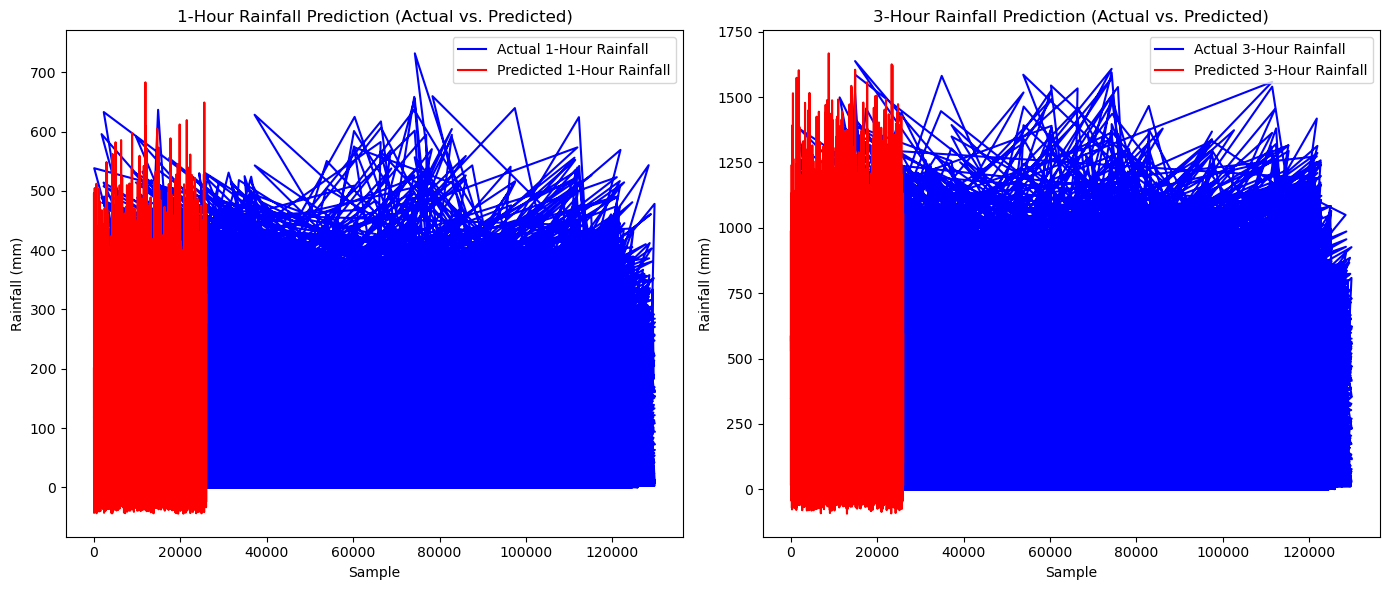

['C:\\Users\\USER\\OneDrive\\Desktop\\project\\scaler.pkl']

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib

# Step 1: Refine the model - Apply feature scaling
scaler = StandardScaler()

# Scale features for both 1-hour and 3-hour rainfall prediction
X_train_1h_scaled = scaler.fit_transform(X_train_1h)
X_test_1h_scaled = scaler.transform(X_test_1h)

X_train_3h_scaled = scaler.fit_transform(X_train_3h)
X_test_3h_scaled = scaler.transform(X_test_3h)

# Re-train the models with scaled features
model_1h_scaled = LinearRegression()
model_1h_scaled.fit(X_train_1h_scaled, y_train_1h)

model_3h_scaled = LinearRegression()
model_3h_scaled.fit(X_train_3h_scaled, y_train_3h)

# Make predictions on the test set
y_pred_1h_scaled = model_1h_scaled.predict(X_test_1h_scaled)
y_pred_3h_scaled = model_3h_scaled.predict(X_test_3h_scaled)

# Step 2: Visualization - Predicted vs. Actual for 1-hour and 3-hour rainfall
plt.figure(figsize=(14, 6))

# 1-hour rainfall predictions (line plot)
plt.subplot(1, 2, 1)
plt.plot(y_test_1h, label='Actual 1-Hour Rainfall', color='blue')
plt.plot(y_pred_1h_scaled, label='Predicted 1-Hour Rainfall', color='red')
plt.title('1-Hour Rainfall Prediction (Actual vs. Predicted)')
plt.xlabel('Sample')
plt.ylabel('Rainfall (mm)')
plt.legend()

# 3-hour rainfall predictions (line plot)
plt.subplot(1, 2, 2)
plt.plot(y_test_3h, label='Actual 3-Hour Rainfall', color='blue')
plt.plot(y_pred_3h_scaled, label='Predicted 3-Hour Rainfall', color='red')
plt.title('3-Hour Rainfall Prediction (Actual vs. Predicted)')
plt.xlabel('Sample')
plt.ylabel('Rainfall (mm)')
plt.legend()

plt.tight_layout()
plt.show()

# Saving the models
joblib.dump(model_1h_scaled,r'C:\Users\USER\OneDrive\Desktop\project\model_1h.pkl')
joblib.dump(model_3h_scaled, r'C:\Users\USER\OneDrive\Desktop\project\model_3h.pkl')
joblib.dump(scaler, r'C:\Users\USER\OneDrive\Desktop\project\scaler.pkl')
